In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import shap
from scipy.sparse import load_npz
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
# Change these sources later!!
train_data_x_sparse = load_npz('valid_data_x_sparse.npz')
train_data_x_dense = pd.read_csv('valid_data_x_dense.csv')

# Combine the loaded sparse matrix with the additional features
train_data_x = pd.DataFrame(hstack([train_data_x_sparse, csr_matrix(train_data_x_dense.values)]).toarray())
train_data_y = np.ravel(pd.read_csv('valid_data_y.csv'))

print(train_data_x.shape)
print(train_data_y.shape)
print(train_data_y[:20])

(1679, 17468)
(1679,)
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1]


In [56]:
# Standard logistic regression / Regularized - ridge

standard_lr_model = LogisticRegression(max_iter=500) # Increase max_iter to allow for convergence

standard_lr_model.fit(train_data_x, train_data_y)

train_data_y_pred = standard_lr_model.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)


F1 score on training data: 0.8859560067681895


In [57]:
# Regularized logistic regression (lasso)

lasso_lr_model = LogisticRegression(penalty='l1', solver='liblinear')

lasso_lr_model.fit(train_data_x, train_data_y)

train_data_y_pred = lasso_lr_model.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)


F1 score on training data: 0.8760553866936845


In [68]:
# Regularized logistic regression (elastic net)

elastic_net_lr_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=500)

# max_iter = 500:
# F1 score on training data: 0.8772985623537278

# max_iter = 2000:
# F1 score on training data: 0.8772985623537278

# max_iter = 4000:
# F1 score on training data: 0.8772985623537278

# max_iter = 6000:
# F1 score on training data: 0.8772985623537278

elastic_net_lr_model.fit(train_data_x, train_data_y)

train_data_y_pred = elastic_net_lr_model.predict(train_data_x)
train_f1_score = f1_score(train_data_y, train_data_y_pred)
print("F1 score on training data:", train_f1_score)

F1 score on training data: 0.8772985623537278


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [71]:
# Samples used for calculating SHAP values

shap_samples = shap.sample(train_data_x, 10) # Should be increased later!! 

100%|██████████| 10/10 [01:22<00:00,  8.27s/it]


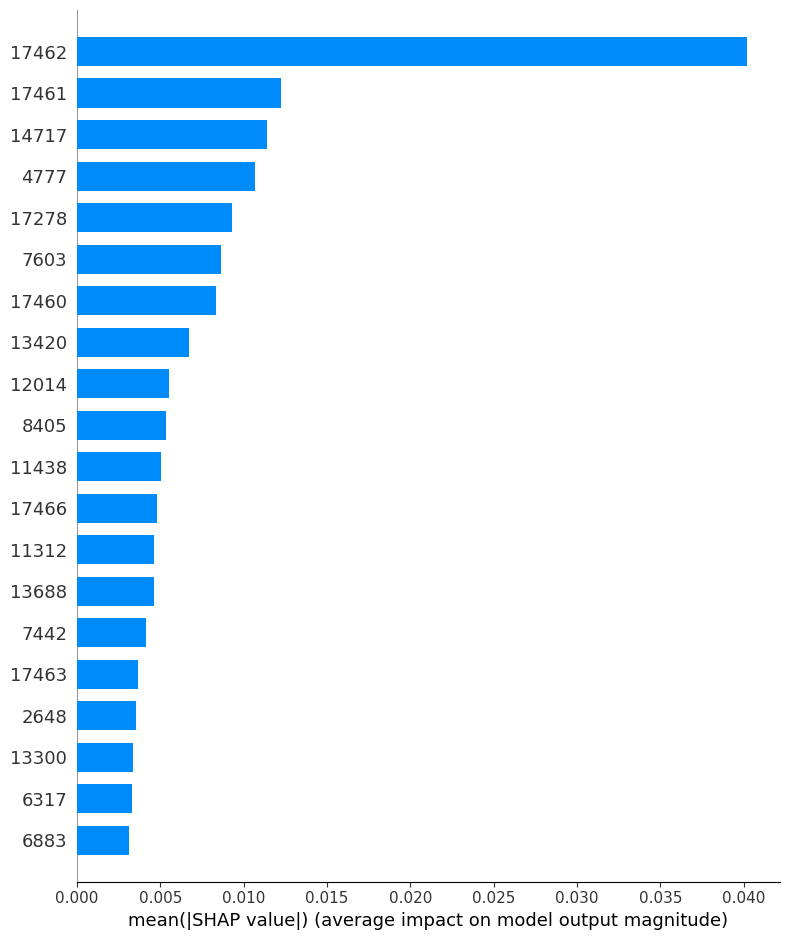

In [72]:
# SHAP explenations standard logistic regression

standard_lr_explainer = shap.KernelExplainer(standard_lr_model.predict, shap_samples)

shap_values = standard_lr_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

In [ ]:
# SHAP explenations lasso logistic regression

lasso_lr_explainer = shap.KernelExplainer(lasso_lr_model.predict, shap_samples)

shap_values = lasso_lr_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')

In [ ]:
# SHAP explenations elastic net logistic regression

elastic_net_lr_explainer = shap.KernelExplainer(elastic_net_lr_model.predict, shap_samples)

shap_values = elastic_net_lr_explainer.shap_values(shap_samples, num_workers=8)

shap.summary_plot(shap_values, features=train_data_x, plot_type='bar')